In [17]:

from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,auc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [18]:
def calculate_sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def calculate_loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def calculate_gradients(X, y, y_hat):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y))
    return dw, db

def train(X, y, bs, epochs, lr):
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape

    w = np.zeros((n,1))
    b = 0

    y = y.reshape(m,1)
    losses = []

    for epoch in range(0,epochs):
        for i in range((m-1)//bs + 1):

            starti = i*bs
            endi = starti + bs
            xb = X[starti:endi]
            yb = y[starti:endi]

            yhat = calculate_sigmoid(np.dot(xb, w) + b)

            dw, db = calculate_gradients(xb, yb, yhat)

            w -= lr*dw
            b -= lr*db

        loss = calculate_loss(y, calculate_sigmoid(np.dot(X, w) + b))
        losses.append(loss)

    return w, b, losses

def predict(X,w,b):
    preds = calculate_sigmoid(np.dot(X, w) + b)
    # Empty List to store predictions.
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

def calculate_accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [19]:
df = pd.read_csv('./dataset/emails.csv', sep=",")
# Dropping the 1st column because it contains index
df = df.drop(columns=df.columns[0])

foldall_train = df.iloc[:4000, :]
foldall_test = df.iloc[4000:5000, :]

# Creating the individual splits
fold0train = df.iloc[:1000, :]
fold0test = df.iloc[1000:, :]

fold1train = df.iloc[1000:2000, :]
fold1test = pd.concat([df.iloc[:1000, :], df.iloc[2000:, :]])

fold2train = df.iloc[2000:3000, :]
fold2test = fold2_test = pd.concat([df.iloc[:2000, :], df.iloc[3000:, :]])

fold3train = df.iloc[3000:4000, :]
fold3test = fold2_test = pd.concat([df.iloc[:3000, :], df.iloc[4000:, :]])

fold4train = df.iloc[4000:5000, :]
fold4test = df.iloc[:3000, :]



In [20]:
w1, b1, l = train(fold0train.iloc[:, :-1], fold0train.iloc[:,-1], bs=100, epochs=1000, lr=0.02)
predicted_c = predict(fold0test.iloc[:, :-1],w1,b1)
print("1fold Accuracy"+str(calculate_accuracy(np.array(fold0test.iloc[:, -1]),predicted_c)))
print("1fold Precision " + str(precision_score(np.array(fold0test.iloc[:, -1]),predicted_c, average='binary')))
print("1fold Recall " + str(recall_score(np.array(fold0test.iloc[:, -1]),predicted_c, average='binary')))

w2, b2, l = train(fold1train.iloc[:, :-1], fold1train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold1test.iloc[:, :-1],w2,b2)
print("2fold Accuracy"+str(calculate_accuracy(np.array(fold1test.iloc[:, -1]),predicted_c)))
print("2fold Precision " + str(precision_score(np.array(fold1test.iloc[:, -1]),predicted_c, average='binary')))
print("2fold Recall " + str(recall_score(np.array(fold1test.iloc[:, -1]),predicted_c, average='binary')))

w3, b3, l = train(fold2train.iloc[:, :-1], fold2train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold2test.iloc[:, :-1],w3,b3)
print("3fold Accuracy"+str(calculate_accuracy(np.array(fold2test.iloc[:, -1]),predicted_c)))
print("3fold Precision " + str(precision_score(np.array(fold2test.iloc[:, -1]),predicted_c, average='binary')))
print("3fold Recall " + str(recall_score(np.array(fold2test.iloc[:, -1]),predicted_c, average='binary')))

w4, b4, l = train(fold3train.iloc[:, :-1], fold3train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold3test.iloc[:, :-1],w4,b4)
print("4fold Accuracy"+str(calculate_accuracy(np.array(fold3test.iloc[:, -1]),predicted_c)))
print("4fold Precision " + str(precision_score(np.array(fold3test.iloc[:, -1]),predicted_c, average='binary')))
print("4fold Recall " + str(recall_score(np.array(fold3test.iloc[:, -1]),predicted_c, average='binary')))

w5, b5, l = train(fold4train.iloc[:, :-1], fold4train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold4test.iloc[:, :-1],w5,b5)
print("5fold Accuracy"+str(calculate_accuracy(np.array(fold4test.iloc[:, -1]),predicted_c)))
print("5fold Precision " + str(precision_score(np.array(fold4test.iloc[:, -1]),predicted_c, average='binary')))
print("5fold Recall " + str(recall_score(np.array(fold4test.iloc[:, -1]),predicted_c, average='binary')))

1fold Accuracy0.9105
1fold Precision 0.8518843120070114
1fold Recall 0.8372093023255814
2fold Accuracy0.9065
2fold Precision 0.8331936295054484
2fold Recall 0.8502994011976048
3fold Accuracy0.912
3fold Precision 0.81640625
3fold Recall 0.8993115318416524
4fold Accuracy0.916
4fold Precision 0.8499142367066895
4fold Recall 0.8602430555555556
5fold Accuracy0.916
5fold Precision 0.8485915492957746
5fold Recall 0.8546099290780141


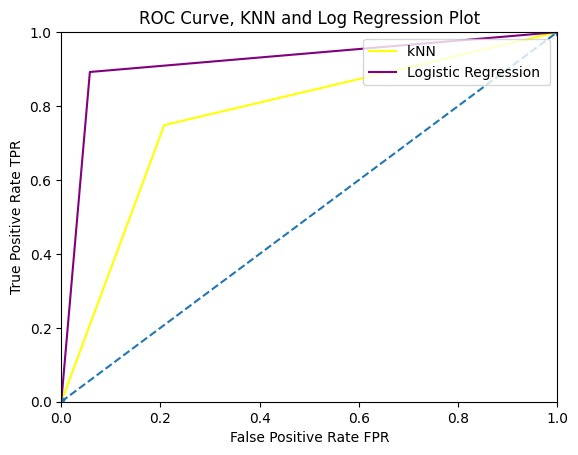

In [16]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from q2 import knn


neigh = knn(df,n_neighbors=5)
neigh.fit(foldall_train.iloc[:, :-1], foldall_train.iloc[:, -1])
y_pred = neigh.predict(foldall_test.iloc[:, :-1])
fpr_knn, tpr_knn, threshold = roc_curve(foldall_test.iloc[:, -1], y_pred)

w, b, l = train(foldall_train.iloc[:, :-1], foldall_train.iloc[:,-1], bs=100, epochs=1000, lr=0.02)
predicted_c = predict(foldall_test.iloc[:, :-1],w,b)

fpr_log, tpr_log, threshold = roc_curve(foldall_test.iloc[:, -1], predicted_c)

plt.title('ROC Curve, KNN and Log Regression Plot')
plt.plot(fpr_knn, tpr_knn, 'b', color="yellow", label="kNN ")
plt.plot(fpr_log, tpr_log, 'b', color="purple", label="Logistic Regression ")

plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1],'v--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate TPR')
plt.xlabel('False Positive Rate FPR')
plt.savefig('logistic.png')